In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
plt.style.use(["science", "notebook", "grid", "dark_background"])

In [3]:
N = 200
h_bar = 1
m = 1
_ = np.linspace(-1, 1, N)
X, Y = np.meshgrid(_, _)

In [18]:
def get_potential(x, y, m, n):
    return 0.5 * (x**2 + y**2) - (2*x*y)

$$
-\frac{\hbar^2}{2m} (D  \otimes D)\psi + VI  \psi = E\psi
$$

# Visualising the potential

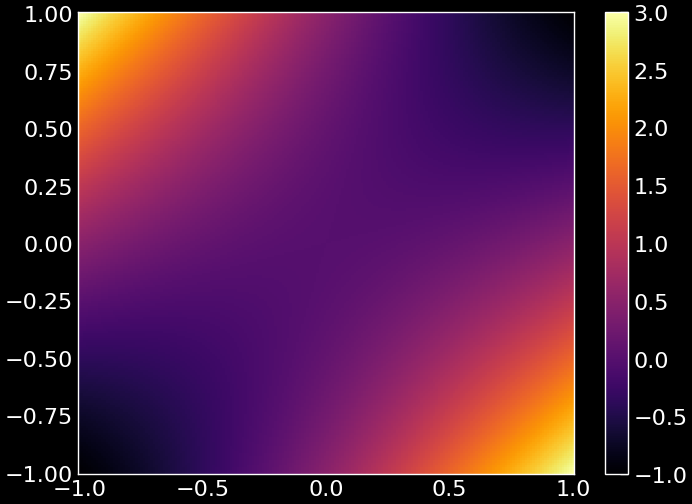

In [19]:
plt.pcolormesh(X, Y, get_potential(X, Y, 1, 5), cmap = "inferno")
plt.colorbar()

# Creation of D matrix

In [20]:
diags = np.array([np.ones(N), -2*np.ones(N), np.ones(N)])
D = scipy.sparse.spdiags(diags, [-1, 0, 1], N, N)

# Creation of the Hamiltonian

In [21]:
T = -0.5 * scipy.sparse.kronsum(D, D)
U = scipy.sparse.diags(get_potential(X, Y, 1, 5).reshape(N**2), (0))
H = T + U

# Get eigen vectors and eigen values

In [22]:
eigenvals, eigenvects = scipy.sparse.linalg.eigsh(A = H, k = 10, which="SM")

KeyboardInterrupt: 

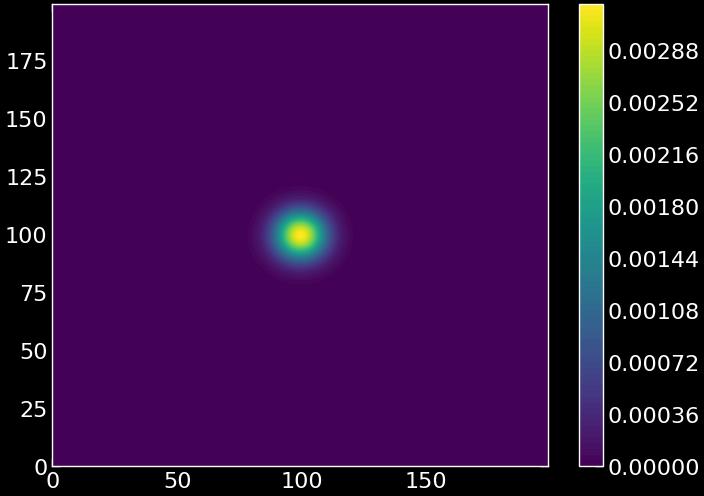

In [16]:
plt.contourf(eigenvects.T[0].reshape(N, N)**2, levels = 100)
plt.colorbar()

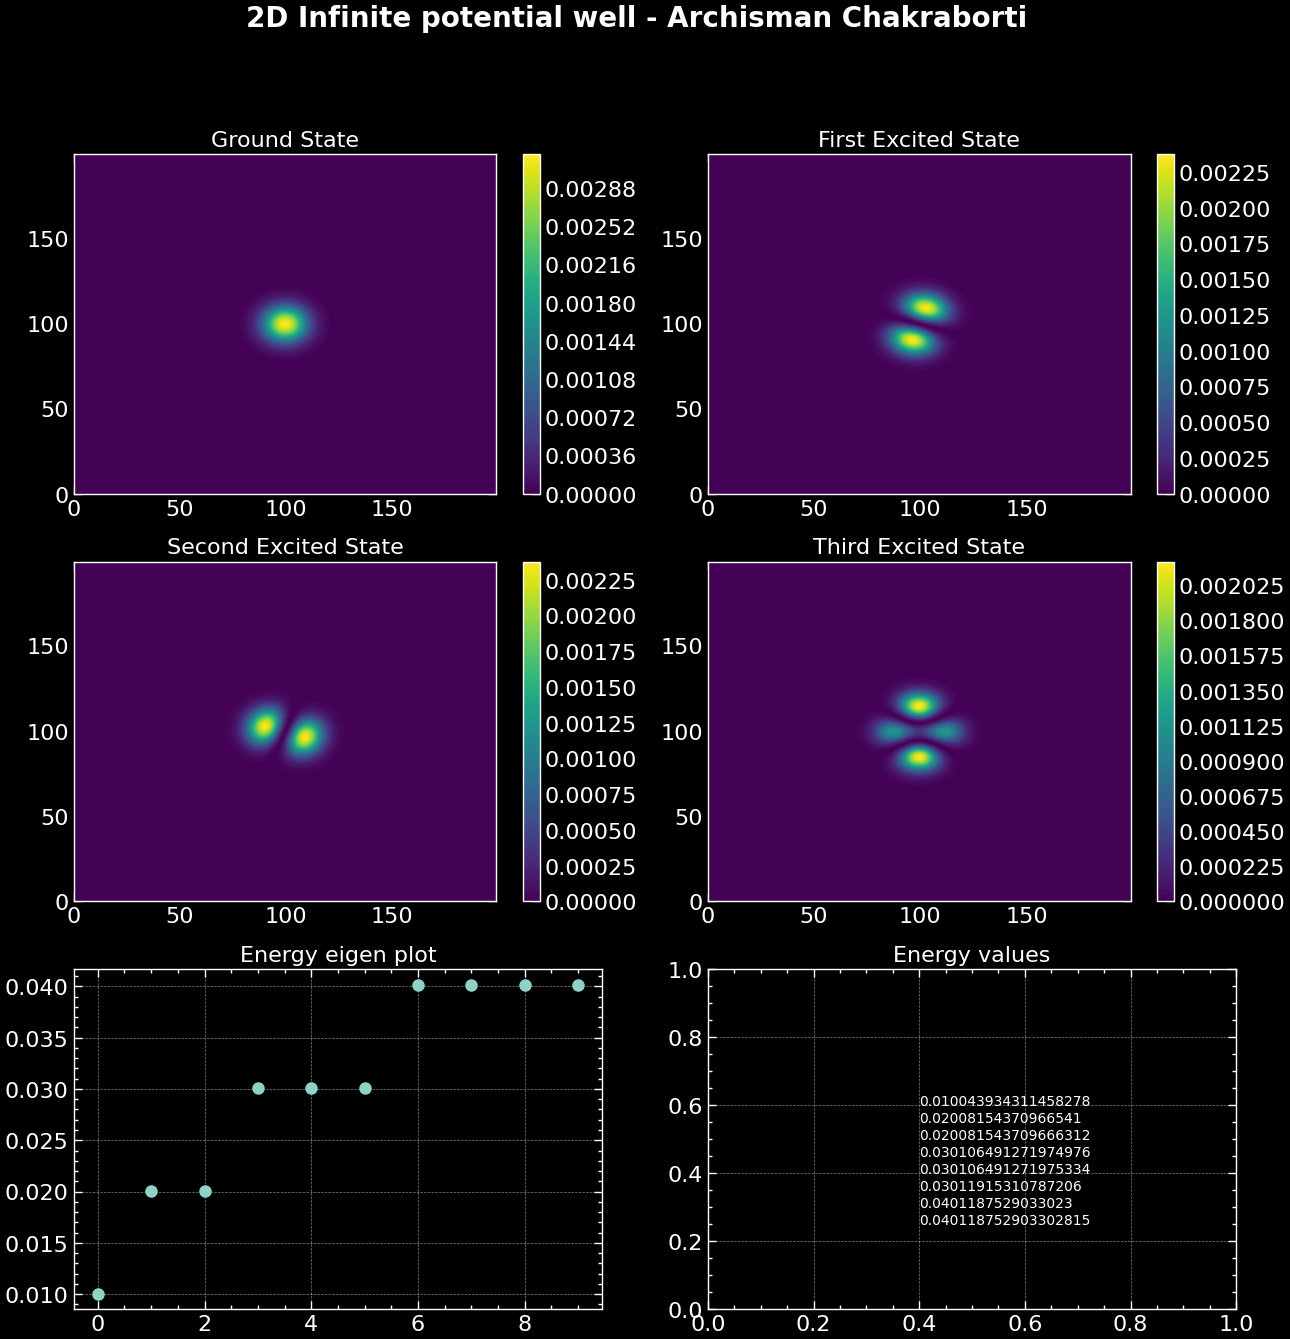

In [17]:
fig, ax = plt.subplots(3, 2, figsize = (15, 15))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.ravel()

fig1 = ax1.contourf(eigenvects.T[0].reshape(N, N)**2, levels = 100)
fig2 = ax2.contourf(eigenvects.T[1].reshape(N, N)**2, levels = 100)
fig3 = ax3.contourf(eigenvects.T[2].reshape(N, N)**2, levels = 100)
fig4 = ax4.contourf(eigenvects.T[3].reshape(N, N)**2, levels = 100)
plt.colorbar(fig1)
plt.colorbar(fig2)
plt.colorbar(fig3)
plt.colorbar(fig4)

ax5.plot(eigenvals[:10], 'o', markersize = 8)
ax5.set_title("Energy eigen plot")

ax1.set_title("Ground State")
ax2.set_title("First Excited State")
ax3.set_title("Second Excited State")
ax4.set_title("Third Excited State")
plt.suptitle("2D Infinite potential well - Archisman Chakraborti", fontsize = 20,
             fontweight = "bold")

ax6.set_title("Energy values")
[ax6.text(0.4, 0.6-i/20, energy) for i, energy in enumerate(eigenvals[:8])];
plt.savefig("dikhawa2.jpg")

In [ ]:
import sympy as sp
from sympy.abc import x
L, n = sp.symbols()